In [1]:
import warnings
warnings.filterwarnings('ignore') #Ignore warnings

#Numpy and Pandas package
import numpy as np
import pandas as pd

#Data Visulization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read/Import dataset
housing = pd.DataFrame(pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\HousePrediction\Housing.csv"))

In [3]:
#Check the head of the dataset (First 5 rows/observations)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Data Inspection
housing.shape  #Shape of data (num rows, num cols)

(545, 13)

In [5]:
housing.info()  #Detailed Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()  #Aggregations of numerical features

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#Data Cleaning

#Check Null values
housing.isnull().sum() * 100 / housing.shape[0]

#There are no Null values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

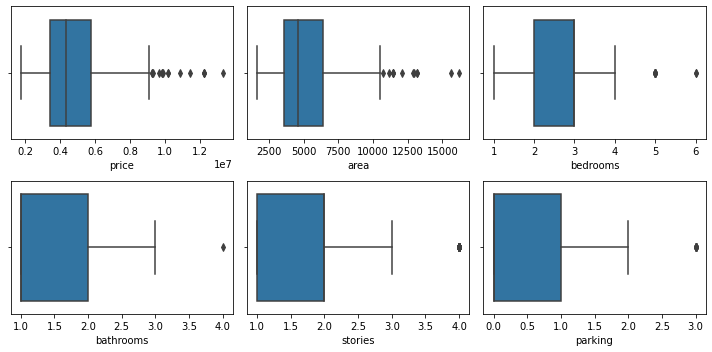

In [8]:
#Outlier Analysis
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

plt1 = sns.boxplot(housing['price'], ax = axs[0, 0])
plt2 = sns.boxplot(housing['area'], ax = axs[0, 1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0, 2])
plt4 = sns.boxplot(housing['bathrooms'], ax = axs[1, 0])
plt5 = sns.boxplot(housing['stories'], ax = axs[1, 1])
plt6 = sns.boxplot(housing['parking'], ax = axs[1, 2])

plt.tight_layout() #fit to one page

#subplots() function in the matplotlib library, helps in creating multiple layouts of subplots.
#It provides control over all the individual plots that are created.
#Boxplots are a measure of how well distributed the data in a data set is. It divides the data set
#into three quartiles. This graph represents the minimum, maximum, median, first quartile and third
#quartile in the data set.
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
#This is an experimental feature and may not work for some cases.

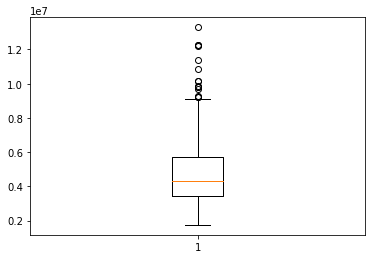

In [9]:
#Outlier Treatment
#Price and area have considerable outliers.
#We can drop the outliers as we have sufficient data.

#Outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5 * IQR) & (housing.price <= Q3 + 1.5 * IQR)]

In [10]:
housing.shape

(530, 13)

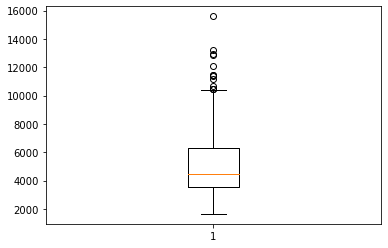

In [11]:
#Outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5 * IQR) & (housing.area <= Q3 + 1.5 * IQR)]

In [12]:
housing.shape

(517, 13)

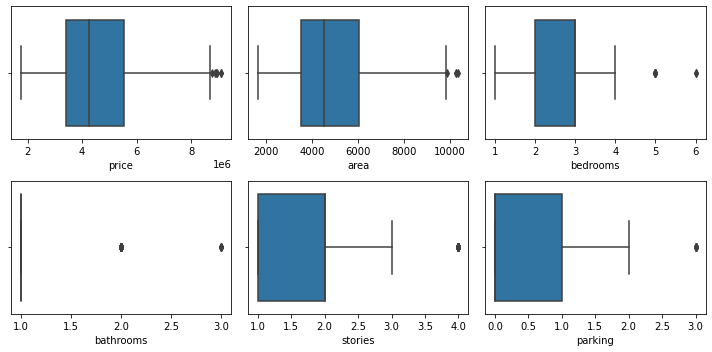

In [13]:
#Outlier Analysis
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

plt1 = sns.boxplot(housing['price'], ax = axs[0, 0])
plt2 = sns.boxplot(housing['area'], ax = axs[0, 1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0, 2])
plt4 = sns.boxplot(housing['bathrooms'], ax = axs[1, 0])
plt5 = sns.boxplot(housing['stories'], ax = axs[1, 1])
plt6 = sns.boxplot(housing['parking'], ax = axs[1, 2])

plt.tight_layout() #fit to one page

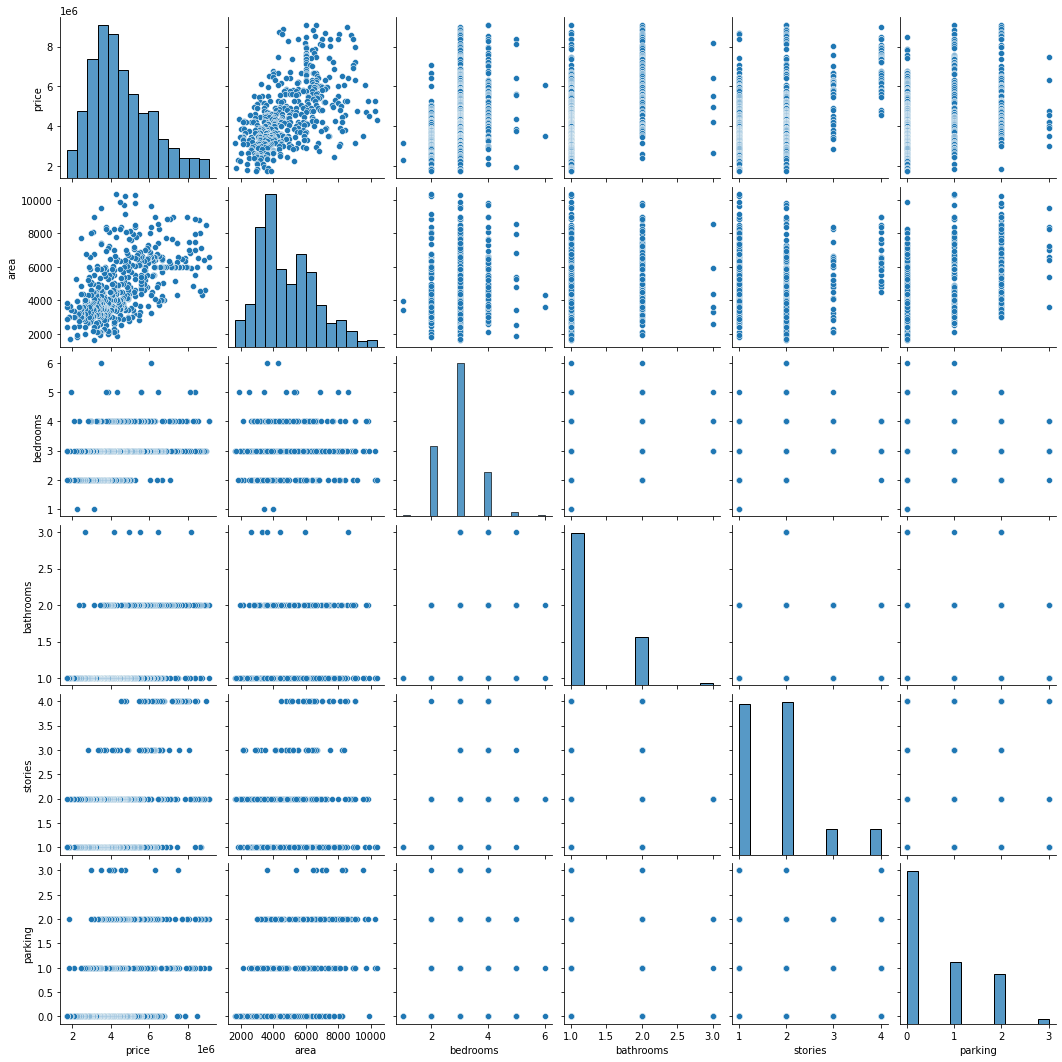

In [14]:
#Exploratory Data Analytics
#Let's now spend some time doing what is arguably the most important step - understanding the data.
#If there is some obvious multicollinearity going on, this is the first place to catch it
#Here's where you'll also identify if some predictors directly have a strong association with the
#outcome variable

#Visualising Numeric Variables
#Let's make a pairplot of all the numeric variables

sns.pairplot(housing)
plt.show()

#A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable
#in data will by shared in the y-axis across a single row and in the x-axis across a single column.
# A pairs plot allows us to see both distribution of single variables and relationships between two
#variables. The default pairs plot in seaborn only plots numerical columns
#The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the
#diagonal allows us to see the distribution of a single variable while the scatter plots on the upper
#and lower triangles show the relationship (or lack thereof) between two variables

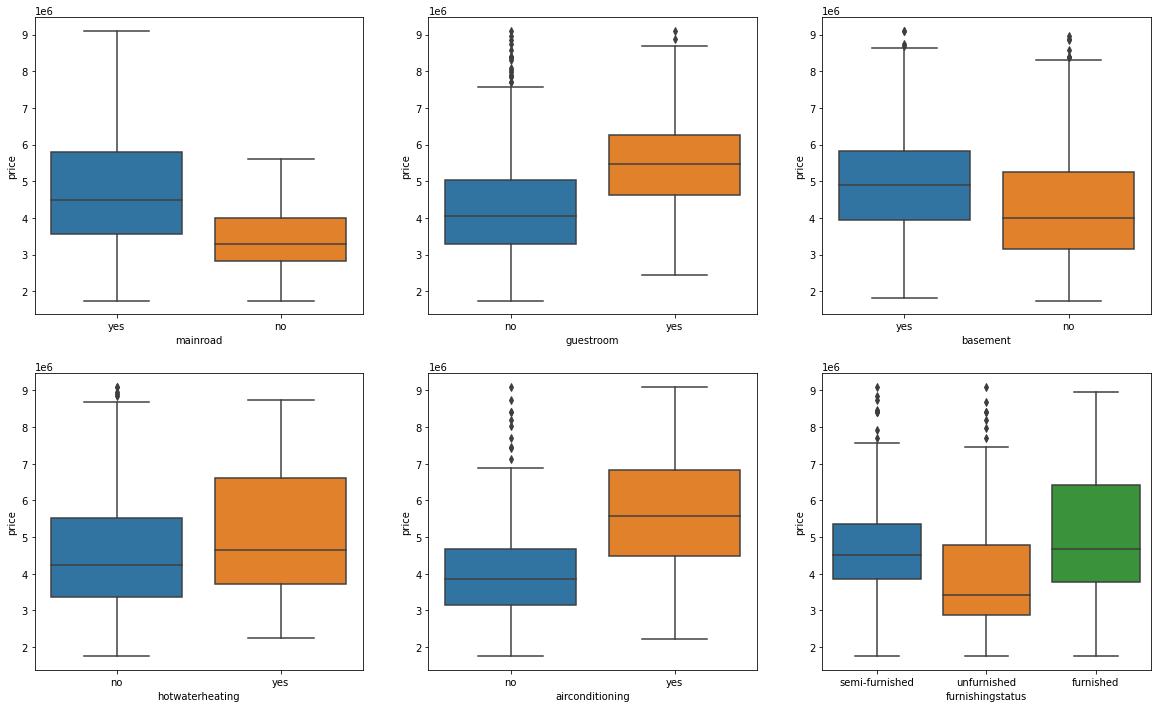

In [16]:
#Visualizing categorical variables
#As you might noticed , there are a few categorical variables as well. Let's make a boxplot for
#some of these variables.
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2, 3, 2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2, 3, 3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2, 3, 4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2, 3, 5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2, 3, 6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

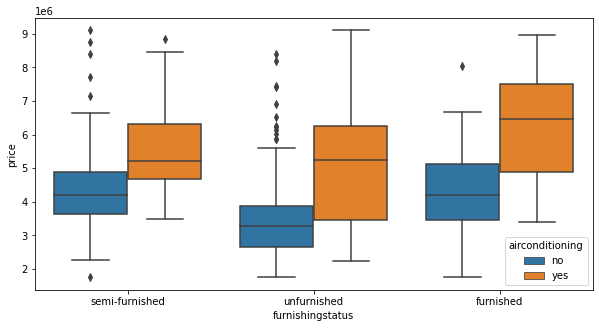

In [20]:
#We can visualize some of the categorical features parallely by using the hue argument.
#Below is the plot for furnishingstatus with airconditioning

plt.figure(figsize=(10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

#hue - When you use the hue parameter, you'll provide a categorical variable. When you pass a
#categorical variable to hue , sns. boxplot will create separate boxes for the different categories,
#and will color those boxes a different “hue"

In [21]:
#Data Preparation
#You can see that the dataset has many columns with values as 'Yes' or 'No'.
#But in order to fit regression line, we would need numerical values and not string.
#Hence, we need to convert them to 1s and 0s, where 1 is 'Yes' and 0 is 'No'.

#List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

#Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [22]:
#Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [23]:
#Dummy variables
#The variable furnishingstatus has 3 levels. We need to convert these levels into integer as well.
#For this, we will use something called dummy variables.

#Get the dummy variables for 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

#Check what the dataset 'status' looks like
status.head()

#get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0
